# We fit a Cauchy distribution to stock return data to test the hypothesis that it is a better approximation than Gaussian

#### Monotonous imports and data transformation. It's all intuitive, scroll down for the goodies.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm.notebook import tqdm
%matplotlib inline
#use %matplotlib notebook for interactive

In [2]:
ticker = 'SPY' 
data_series = pd.Series(dtype='float64')
data_series = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [3]:
log_returns = np.log(1 + data_series.pct_change())

In [4]:
mu = log_returns.mean()

In [5]:
var = log_returns.var()

In [6]:
data = pd.DataFrame()
data['log_returns'] = log_returns

In [7]:
data['normed'] = (data['log_returns'] - np.float64(mu)) / np.float64(np.sqrt(var))

In [8]:
data.dropna()

,log_returns,normed
Date,,
2007-01-04,0.002120,0.135091
2007-01-05,-0.008008,-0.658880
2007-01-08,0.004614,0.330648
2007-01-09,-0.000851,-0.097771
2007-01-10,0.003326,0.229649
...,...,...
2021-12-01,-0.011169,-0.906686
2021-12-02,0.015200,1.160492
2021-12-03,-0.008739,-0.716195


In [9]:
ordered = data['normed']
ordered.head()
ordered = ordered.dropna()
ordered.reset_index(drop=True, inplace=True)
ordered.sort_values(kind='quicksort', inplace=True)
ordered.reset_index(drop=True, inplace=True)

## The goodies begin here

#### The functions are nested hierarchically. That is, 1 calls 2, 2 calls 3, 3 calls 4.

#### They take a list of prices and fit a Cauchy distribution

In [10]:
def fit_cauchy(prices):
    log_returns = np.log(1 + prices.pct_change())
    mu = log_returns.mean()
    var = log_returns.var()
    data['log_returns'] = log_returns
    data['normed'] = (data['log_returns'] - np.float64(mu)) / np.float64(np.sqrt(var))
    data.dropna()
    ordered = data['normed']
    ordered.head()
    ordered = ordered.dropna()
    ordered.reset_index(drop=True, inplace=True)
    ordered.sort_values(kind='quicksort', inplace=True)
    ordered.reset_index(drop=True, inplace=True)
    gamma_mle = get_cauchy_gamma(ordered)
    return gamma_mle

In [11]:
def get_cauchy_gamma(returns):
    best_odds = -120000
    most_likely_gamma = .01
    for gamma_x_1000 in tqdm(range(1,500,1)):
        current_odds = odds(gamma_x_1000/1000, returns)
        print("current:" + str(current_odds) + ", best: " + str(best_odds))
        if current_odds > best_odds:
            best_odds = current_odds
            most_likely_gamma = gamma_x_1000/1000
    return most_likely_gamma

In [12]:
def odds(gamma, returns):
    sum = 0
    for entry in returns:
        sum = sum + np.log(cauchy_probability(entry, gamma))
    return sum

In [13]:
def cauchy_probability(x, gamma):
    top = np.arctan((x+.00000000001)/gamma)/np.pi
    bottom = np.arctan((x-.00000000001)/gamma)/np.pi
    return (top-bottom)

In [14]:
gmle = fit_cauchy(data_series)

  0%|          | 0/499 [00:00<?, ?it/s]

current:-114334.31686800803, best: -120000
current:-111751.2797072456, best: -114334.31686800803
current:-110248.85883889774, best: -111751.2797072456
current:-109188.00098170107, best: -110248.85883889774
current:-108370.4897335265, best: -109188.00098170107
current:-107706.55616239177, best: -108370.4897335265
current:-107148.52823641174, best: -107706.55616239177
current:-106668.5034372834, best: -107148.52823641174
current:-106247.0889080032, best: -106668.5034372834
current:-105872.93670750469, best: -106247.0889080032
current:-105536.1212478254, best: -105872.93670750469
current:-105230.5352536212, best: -105536.1212478254
current:-104951.35392102036, best: -105230.5352536212
current:-104693.76028026557, best: -104951.35392102036
current:-104455.76436472574, best: -104693.76028026557
current:-104234.22241688434, best: -104455.76436472574
current:-104027.5033482868, best: -104234.22241688434
current:-103833.56598280912, best: -104027.5033482868
current:-103650.9951066918, best: -1

current:-98007.42340565765, best: -98017.32830561927
current:-97997.66664858398, best: -98007.42340565765
current:-97987.9984215134, best: -97997.66664858398
current:-97978.48990651804, best: -97987.9984215134
current:-97969.07734241024, best: -97978.48990651804
current:-97959.7876939486, best: -97969.07734241024
current:-97950.61531168094, best: -97959.7876939486
current:-97941.56813989833, best: -97950.61531168094
current:-97932.6269394188, best: -97941.56813989833
current:-97923.79403020894, best: -97932.6269394188
current:-97915.08109415599, best: -97923.79403020894
current:-97906.47517065932, best: -97915.08109415599
current:-97897.98286134524, best: -97906.47517065932
current:-97889.58410353435, best: -97897.98286134524
current:-97881.29160675293, best: -97889.58410353435
current:-97873.11570958729, best: -97881.29160675293
current:-97865.04513823576, best: -97873.11570958729
current:-97857.0777003636, best: -97865.04513823576
current:-97849.2012523576, best: -97857.0777003636
cu

current:-97343.96202643403, best: -97344.78769961093
current:-97343.15941245611, best: -97343.96202643403
current:-97342.3828547339, best: -97343.15941245611
current:-97341.61801801118, best: -97342.3828547339
current:-97340.8776336761, best: -97341.61801801118
current:-97340.16138723919, best: -97340.8776336761
current:-97339.46305981617, best: -97340.16138723919
current:-97338.78222565453, best: -97339.46305981617
current:-97338.13699100816, best: -97338.78222565453
current:-97337.49534849927, best: -97338.13699100816
current:-97336.87584187357, best: -97337.49534849927
current:-97336.29390481708, best: -97336.87584187357
current:-97335.70257516475, best: -97336.29390481708
current:-97335.13713649189, best: -97335.70257516475
current:-97334.61185691405, best: -97335.13713649189
current:-97334.09152671113, best: -97334.61185691405
current:-97333.59132588527, best: -97334.09152671113
current:-97333.1074408267, best: -97333.59132588527
current:-97332.65455493683, best: -97333.1074408267

current:-97403.95565884683, best: -97326.80529780468
current:-97405.12400734097, best: -97326.80529780468
current:-97406.30481105835, best: -97326.80529780468
current:-97407.47510061796, best: -97326.80529780468
current:-97408.6645895813, best: -97326.80529780468
current:-97409.86109289924, best: -97326.80529780468
current:-97411.05551375423, best: -97326.80529780468
current:-97412.26332967952, best: -97326.80529780468
current:-97413.47292801549, best: -97326.80529780468
current:-97414.68931626788, best: -97326.80529780468
current:-97415.90841916931, best: -97326.80529780468
current:-97417.14836885592, best: -97326.80529780468
current:-97418.37735592121, best: -97326.80529780468
current:-97419.61345937791, best: -97326.80529780468
current:-97420.8618885389, best: -97326.80529780468
current:-97422.11018585888, best: -97326.80529780468
current:-97423.37606638516, best: -97326.80529780468
current:-97424.6369905319, best: -97326.80529780468


#### This is the parameter estimate

In [15]:
gmle

0.366

#### Now we want to sample from this distribution we have found to represent our data

In [16]:
def cauchy_sample(gamma):
    unif_sample = np.random.uniform()
    s = gamma * np.tan(np.pi*(unif_sample-0.5))
    return s

In [18]:
def cauchy_array(test_size, simulations, gamma):
    sample_array = np.zeros((test_size, simulations))
    for i in range(len(sample_array)):
        for j in range(len(sample_array[i])):
            sample_array[i][j] = cauchy_sample(gamma)
    return sample_array

In [19]:
cauchy_sample(gmle)

0.14895938309161266

In [20]:
cauchy_sampling_distribution_test = []
for i in range(100):
    cauchy_sampling_distribution_test.append(cauchy_sample(gmle))

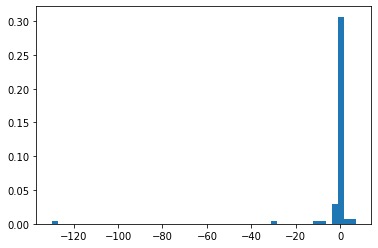

In [21]:
bins = plt.hist(cauchy_sampling_distribution_test, bins=50, density=True, color=None, label=None, stacked=False)

#### Now we modify the drift optimization formula slightly to work with the gamma distribution too. Scroll to the very end for results.

In [22]:
def optimize_drift(past_prices, test_size, simulations=10, resolution=2, scale=1, chop=0, gamma=0):
    if chop == 0:
        test_set = past_prices[-1*test_size:]
        past_prices = past_prices[0:len(past_prices)-test_size]
    if chop != 0:
        test_set = past_prices[-1*test_size-chop:-1*chop]
        past_prices = past_prices[0:len(past_prices)-test_size-chop]
    log_ret = np.log(1 + past_prices.pct_change())
    sample_mu = log_ret.mean()
    sample_var = log_ret.var()
    h_results = np.zeros((10**resolution//scale, 2))
    first = past_prices[-1]
    for h in range(1,len(h_results),1):
        h_results[h,0] = h/(10**(resolution-2))
        h_results[h,1] = simulation_results(h/(10**(resolution-2)), test_size, sample_mu,
                                            sample_var, simulations, first, test_set, gamma)
    h_results = h_results[1:]
    return h_results

In [23]:
def simulation_results(h, test_size, sample_mu, sample_var, simulations, first, test_set, gamma):
    h_drift = sample_mu - (h * sample_var)
    sample_stdev = np.sqrt(sample_var)
    if gamma == 0:
        h_returns = np.exp(h_drift + sample_stdev * norm.ppf(np.random.rand(test_size, simulations)))
    if gamma != 0:
        h_returns = np.exp(h_drift + sample_stdev * cauchy_array(test_size, simulations, gamma))
    h_prices = np.zeros_like(h_returns)
    h_prices[0] = first
    for t in range(1, test_size):
        h_prices[t] = h_prices[t - 1] * h_returns[t]
    average = sum(h_prices[-1])/len(h_prices[-1])
    losses = abs(test_set[-1] - average)
    return losses

C:\Users\Tristan\AppData\Local\Temp/ipykernel_18672/1837271386.py:7: RuntimeWarning: overflow encountered in exp
  h_returns = np.exp(h_drift + sample_stdev * cauchy_array(test_size, simulations, gamma))


<AxesSubplot:xlabel='h'>

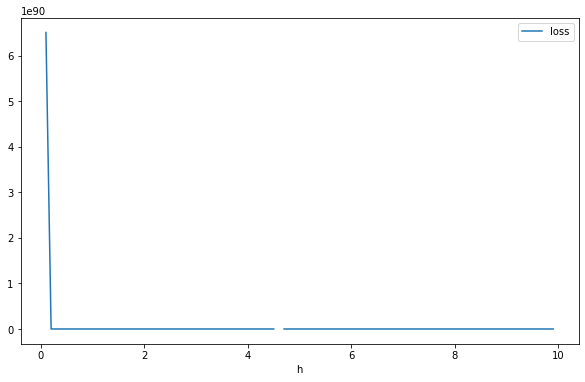

In [24]:
testing_optimization = optimize_drift(data_series, test_size=3, simulations=1000, resolution=3, scale=10, chop=3, gamma=.3)
t_o_df = pd.DataFrame(testing_optimization, columns = ['h','loss'])
t_o_df.plot(x='h', y='loss', figsize=(10, 6))

In [25]:
drift = mu - (0.5 * var)
stdev = np.sqrt(var)
t_intervals = 1000
iterations = 10
gamma = .336

In [26]:
daily_returns = np.exp(drift + stdev * cauchy_array(t_intervals, iterations, gamma))

In [27]:
daily_returns

array([[1.00483885, 1.00969352, 1.09097077, ..., 1.0014037 , 0.99711183,
        0.99863835],
       [1.00899887, 1.00164277, 1.00014132, ..., 1.00541751, 1.005085  ,
        0.99208282],
       [0.99666478, 0.99973983, 0.99251289, ..., 0.98535192, 0.97483719,
        1.03235953],
       ...,
       [1.00553715, 0.77370699, 1.00103962, ..., 1.00089615, 0.980814  ,
        0.99424532],
       [1.00601255, 0.99690751, 0.99607116, ..., 0.99160981, 0.99885506,
        1.00131119],
       [0.9947701 , 0.98599297, 1.02197403, ..., 0.99929787, 1.00033153,
        0.99530193]])

In [28]:
S0 = data_series.iloc[-1]

In [29]:
price_list = np.zeros_like(daily_returns)

In [30]:
price_list[0] = S0
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [31]:
price_list

array([[4.68279999e+02, 4.68279999e+02, 4.68279999e+02, ...,
        4.68279999e+02, 4.68279999e+02, 4.68279999e+02],
       [4.72493988e+02, 4.69049274e+02, 4.68346175e+02, ...,
        4.70816910e+02, 4.70661202e+02, 4.64572542e+02],
       [4.70918116e+02, 4.68927240e+02, 4.64839613e+02, ...,
        4.63920347e+02, 4.58818042e+02, 4.79605893e+02],
       ...,
       [2.29792056e+14, 3.43373324e-03, 1.45843176e+03, ...,
        5.00758210e+02, 9.82085635e+20, 6.35608091e+17],
       [2.31173692e+14, 3.42311447e-03, 1.45270181e+03, ...,
        4.96556755e+02, 9.80961203e+20, 6.36441497e+17],
       [2.29964677e+14, 3.37516680e-03, 1.48462352e+03, ...,
        4.96208109e+02, 9.81286424e+20, 6.33451451e+17]])

#### Ten simulations are performed. In one of the simulations, you become a zettanaire (you have something on the order of $10^{21}$ dollars)

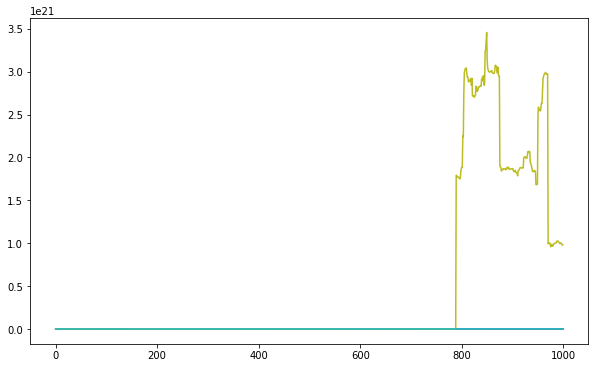

In [32]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

#### While this would be nice, it's not very realistic. Let's stick to the Gaussian.